# Modelo de Regresion Logistica Binaria

In [52]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Datos Preprocesados de train_data

In [53]:
# cargar datos que cosnideran los valores faltantes
df = pd.read_csv('../Datos_Hackaton/train_data_preparado2.csv', sep=',')
df

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,edad_ingreso
0,Híbrida,Mujer,Ferias & Networking,Soltero,100247.0,102074.0,1.0,2.0,1.0,1.0,140011.0,99.0,75.0,0.0,19.0
1,Híbrida,Hombre,Ferias & Networking,Soltero,103355.0,102115.0,1.0,1.0,2.0,2.0,182774.0,99.0,81.0,1.0,25.0
2,Híbrida,Mujer,Referidos,Viudo,100669.0,102060.0,1.0,5.0,3.0,11.0,682106.0,96.0,74.0,0.0,45.0
3,Híbrida,Hombre,Linkedin,Soltero,103760.0,102062.0,1.0,13.0,2.0,2.0,270232.0,96.0,82.0,1.0,22.0
4,Híbrida,Hombre,Linkedin,Soltero,100965.0,102062.0,1.0,13.0,2.0,2.0,266804.0,95.0,82.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,Presencial,Mujer,Portal Web,Casado,103567.0,102171.0,1.0,2.0,8.0,3.0,281159.0,67.0,65.0,1.0,47.0
2148,Presencial,Mujer,Linkedin,Casado,104098.0,102172.0,1.0,1.0,12.0,13.0,460337.0,75.0,82.0,1.0,47.0
2149,Presencial,Hombre,Portal Web,Soltero,103987.0,102155.0,1.0,2.0,1.0,11.0,633879.0,68.0,66.0,1.0,51.0
2150,Presencial,Hombre,Portal Web,Casado,103810.0,102141.0,1.0,6.0,2.0,6.0,793977.0,61.0,80.0,1.0,52.0


## Missing

In [54]:
df.isnull().sum()

modalidad_trabajo       0
genero                  0
canal_reclutamiento     0
estado_civil            0
id_colaborador          0
id_ultimo_jefe          0
seniority               0
distancia_oficina       0
dias_baja_salud         0
permanencia_promedio    0
salario                 0
performance_score       0
psi_score               0
abandono_6meses         0
edad_ingreso            0
dtype: int64

## Transformar variables Categoricas a numericas

In [55]:
# Convertimos variables categoricas en numericas con get_dummies
df_prep = pd.get_dummies(df)
df_prep.head(5)

,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,...,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo
0,100247.0,102074.0,1.0,2.0,1.0,1.0,140011.0,99.0,75.0,0.0,...,1,1,0,0,0,0,0,0,1,0
1,103355.0,102115.0,1.0,1.0,2.0,2.0,182774.0,99.0,81.0,1.0,...,0,1,0,0,0,0,0,0,1,0
2,100669.0,102060.0,1.0,5.0,3.0,11.0,682106.0,96.0,74.0,0.0,...,1,0,0,0,0,1,0,0,0,1
3,103760.0,102062.0,1.0,13.0,2.0,2.0,270232.0,96.0,82.0,1.0,...,0,0,0,1,0,0,0,0,1,0
4,100965.0,102062.0,1.0,13.0,2.0,2.0,266804.0,95.0,82.0,0.0,...,0,0,0,1,0,0,0,0,1,0


## Analisis de Correlacion

In [56]:
import matplotlib.pyplot as plt

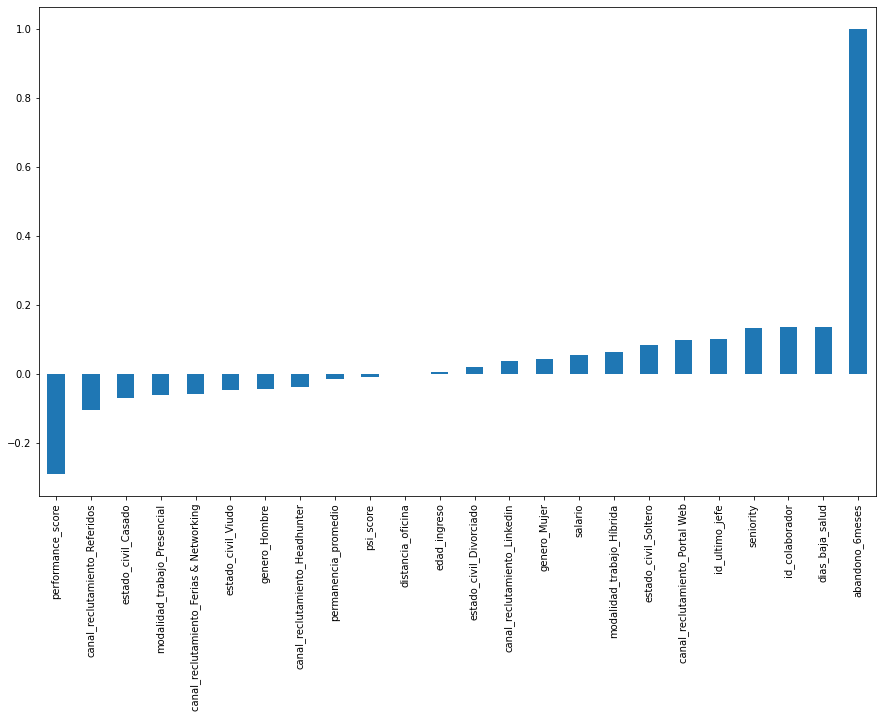

In [57]:
fig = plt.figure(figsize=(15,9))
df_prep.corr()['abandono_6meses'].sort_values(ascending=True).plot(kind='bar')
plt.show()

- La variable **performance_score** es la que mayor correlacion presenta con la variable objetivo
- La variable **dias_baja_salud** es la segunda con mayor correlacion con la variables objetivo
- A pesar que existe correlacion entre algunas variables, esta es baja.

## Seleccion de variables predictoras y objetivo

In [58]:
# variables predictoras
X = df_prep.drop('abandono_6meses',axis=1)

# variables objetivo
y = df_prep['abandono_6meses'].values

## Escalar los datos

In [59]:
# libreria para escalar datos
from sklearn.preprocessing import MinMaxScaler

In [60]:
# creamos el objeto escalador
scaler = MinMaxScaler()

# pasamos al escalador las variables predictoras
Xs =  scaler.fit_transform(X)

In [61]:
# pasamos las variables predictoras a un dataframe
Xs = pd.DataFrame(Xs)

Xs

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.058993,0.430233,0.0,0.095238,0.028571,0.000000,0.034818,1.000000,0.425,0.175439,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.804317,0.668605,0.0,0.047619,0.057143,0.041667,0.058269,1.000000,0.575,0.280702,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160192,0.348837,0.0,0.238095,0.085714,0.416667,0.332104,0.968085,0.400,0.631579,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.901439,0.360465,0.0,0.619048,0.057143,0.041667,0.106232,0.968085,0.600,0.228070,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.231175,0.360465,0.0,0.619048,0.057143,0.041667,0.104352,0.957447,0.600,0.228070,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,0.855156,0.994186,0.0,0.095238,0.228571,0.083333,0.112224,0.659574,0.175,0.666667,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2148,0.982494,1.000000,0.0,0.047619,0.342857,0.500000,0.210486,0.744681,0.600,0.666667,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2149,0.955875,0.901163,0.0,0.095238,0.028571,0.416667,0.305656,0.670213,0.200,0.736842,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2150,0.913429,0.819767,0.0,0.285714,0.057143,0.208333,0.393454,0.595745,0.550,0.754386,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [62]:
# recuperamos los nombres de las variables predictoras
Xs.columns = X.columns
Xs

,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso,...,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo
0,0.058993,0.430233,0.0,0.095238,0.028571,0.000000,0.034818,1.000000,0.425,0.175439,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.804317,0.668605,0.0,0.047619,0.057143,0.041667,0.058269,1.000000,0.575,0.280702,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160192,0.348837,0.0,0.238095,0.085714,0.416667,0.332104,0.968085,0.400,0.631579,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.901439,0.360465,0.0,0.619048,0.057143,0.041667,0.106232,0.968085,0.600,0.228070,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.231175,0.360465,0.0,0.619048,0.057143,0.041667,0.104352,0.957447,0.600,0.228070,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,0.855156,0.994186,0.0,0.095238,0.228571,0.083333,0.112224,0.659574,0.175,0.666667,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2148,0.982494,1.000000,0.0,0.047619,0.342857,0.500000,0.210486,0.744681,0.600,0.666667,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2149,0.955875,0.901163,0.0,0.095238,0.028571,0.416667,0.305656,0.670213,0.200,0.736842,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2150,0.913429,0.819767,0.0,0.285714,0.057143,0.208333,0.393454,0.595745,0.550,0.754386,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# Datos Preprocesados de test_data

In [63]:
df_test = pd.read_csv('../Datos_Hackaton/test_data_preparado.csv', sep=',')
df_test.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,19/01/1997,181654,99,81,24/07/2021,Soltero
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,20/08/1999,140986,97,75,27/01/2018,Soltero
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,29/10/1984,406690,96,69,24/04/2022,Soltero
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,9/11/1992,249107,95,73,23/05/2023,Casado
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,14/07/1969,698318,95,81,20/06/2015,Viudo


## Obtener Edad de ingreso de los empleados

In [64]:
# copia del dataframe
df_X = df_test.copy(deep=True)
df_X.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,19/01/1997,181654,99,81,24/07/2021,Soltero
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,20/08/1999,140986,97,75,27/01/2018,Soltero
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,29/10/1984,406690,96,69,24/04/2022,Soltero
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,9/11/1992,249107,95,73,23/05/2023,Casado
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,14/07/1969,698318,95,81,20/06/2015,Viudo


In [65]:
# convertimos las variables fecha_incorporacion y fecha_nacimiento en a tipo datetime

# fecha_incorporacion
df_X['fecha_incorporacion'] = pd.to_datetime(df_X['fecha_incorporacion'], format='%d/%m/%Y')

# fecha_nacimiento
df_X['fecha_nacimiento'] = pd.to_datetime(df_X['fecha_nacimiento'], format='%d/%m/%Y')

# crear variable year_nacimiento
df_X['year_nacimiento'] = df_X['fecha_nacimiento'].dt.year.astype(int)

# crear variable year_incorporacion
df_X['year_incorporacion'] = df_X['fecha_incorporacion'].dt.year.astype(int)

# mostrar resultados
df_X.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,year_nacimiento,year_incorporacion
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,1997-01-19,181654,99,81,2021-07-24,Soltero,1997,2021
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,1999-08-20,140986,97,75,2018-01-27,Soltero,1999,2018
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,1984-10-29,406690,96,69,2022-04-24,Soltero,1984,2022
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,1992-11-09,249107,95,73,2023-05-23,Casado,1992,2023
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,1969-07-14,698318,95,81,2015-06-20,Viudo,1969,2015


In [66]:
# eliminar fecha_incorporacion
df_X = df_X.drop('fecha_incorporacion', axis=1)

# eliminar fecha_nacimiento
df_X = df_X.drop('fecha_nacimiento', axis=1)

# mostrar resultados
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_colaborador        2020 non-null   int64  
 1   id_ultimo_jefe        2020 non-null   float64
 2   seniority             2020 non-null   int64  
 3   modalidad_trabajo     2020 non-null   object 
 4   distancia_oficina     2020 non-null   float64
 5   dias_baja_salud       2020 non-null   int64  
 6   genero                2020 non-null   object 
 7   canal_reclutamiento   2020 non-null   object 
 8   permanencia_promedio  2020 non-null   int64  
 9   salario               2020 non-null   int64  
 10  performance_score     2020 non-null   int64  
 11  psi_score             2020 non-null   int64  
 12  estado_civil          2020 non-null   object 
 13  year_nacimiento       2020 non-null   int64  
 14  year_incorporacion    2020 non-null   int64  
dtypes: float64(2), int64(

In [67]:
df_X['edad_ingreso'] = df_X['year_incorporacion'] - df_X['year_nacimiento']

df_X.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,year_nacimiento,year_incorporacion,edad_ingreso
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,181654,99,81,Soltero,1997,2021,24
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,140986,97,75,Soltero,1999,2018,19
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,406690,96,69,Soltero,1984,2022,38
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,249107,95,73,Casado,1992,2023,31
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,698318,95,81,Viudo,1969,2015,46


In [68]:
# eliminar year_nacimiento
df_X = df_X.drop('year_nacimiento', axis=1)

# eliminar year_incorporacion
df_X = df_X.drop('year_incorporacion', axis=1)

# mostrar resultados
df_X.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,edad_ingreso
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,181654,99,81,Soltero,24
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,140986,97,75,Soltero,19
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,406690,96,69,Soltero,38
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,249107,95,73,Casado,31
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,698318,95,81,Viudo,46


## Convertir variables categoricas a numericas

In [69]:
# Convertimos variables categoricas en numericas con get_dummies
df_X = pd.get_dummies(df_X)
df_X.head(5)

,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso,...,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo
0,100486,102115.0,1,0.795,2,2,181654,99,81,24,...,0,1,0,0,0,0,0,0,1,0
1,103752,102074.0,1,1.715,1,1,140986,97,75,19,...,1,1,0,0,0,0,0,0,1,0
2,103937,102150.0,1,2.375,1,6,406690,96,69,38,...,0,0,0,0,1,0,0,0,1,0
3,101744,102172.0,1,2.185,3,3,249107,95,73,31,...,0,0,0,1,0,0,1,0,0,0
4,101037,102060.0,1,4.660,3,10,698318,95,81,46,...,0,0,0,0,0,1,0,0,0,1


## Escalar datos de Test

In [70]:
# creamos el objeto escalador
scaler = MinMaxScaler()

# pasamos al escalador las variables predictoras
Xt =  scaler.fit_transform(df_X)

In [71]:
# pasamos las variables predictoras a un dataframe
Xt = pd.DataFrame(Xt)

# recuperamos los nombres de las variables predictoras
Xt.columns = df_X.columns
Xt

,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso,...,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo
0,0.116491,0.668605,0.0,0.049157,0.086957,0.038462,0.058174,1.000000,0.575,0.264151,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.899329,0.430233,0.0,0.115178,0.043478,0.000000,0.035884,0.894737,0.425,0.169811,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.943672,0.872093,0.0,0.162540,0.043478,0.192308,0.181516,0.842105,0.275,0.528302,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.418025,1.000000,0.0,0.148906,0.130435,0.076923,0.095145,0.789474,0.375,0.396226,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.248562,0.348837,0.0,0.326516,0.130435,0.346154,0.341358,0.789474,0.575,0.679245,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.900048,0.936047,0.0,0.207033,0.086957,0.576923,0.342726,0.526316,0.275,0.811321,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2016,0.953020,0.994186,0.0,0.191245,0.000000,0.153846,0.329712,0.684211,0.200,0.811321,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2017,0.986337,0.837209,0.0,0.278436,0.043478,0.230769,0.438901,0.210526,0.275,0.811321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2018,0.939597,0.883721,0.0,0.501615,0.043478,0.269231,0.352749,0.578947,0.425,0.849057,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Entrenamiento del Modelo

In [72]:
# dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs,y, test_size=0.3, random_state=42)

In [73]:
# llamada del modelo
from sklearn.linear_model import LogisticRegression

# instanciamos el modelo en una variable
model = LogisticRegression()

# entrenamos el modelo con los datos de entrenamiento
result = model.fit(X_train, y_train)

In [74]:
# llamamos las metricas del modelo
from sklearn import metrics

# creamos la prediccion
prediction_test = model.predict(X_test)

# mostramos la metrica de precision de la prediccion versus el valor real
print('Accuracy: ',metrics.accuracy_score(y_test,prediction_test))

Accuracy:  0.6795665634674922


# Evaluacion del Modelo

AxesSubplot(0.125,0.125;0.775x0.755)


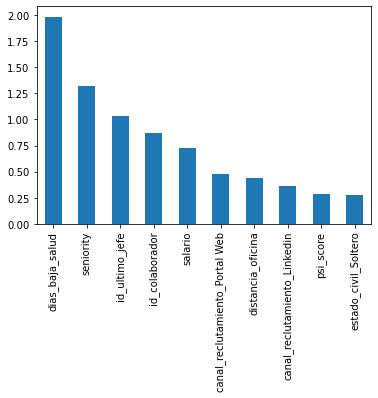

In [75]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'));

AxesSubplot(0.125,0.125;0.775x0.755)


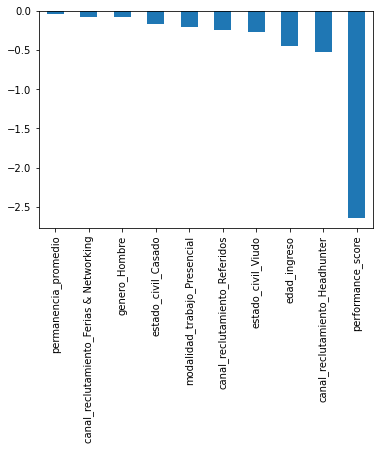

In [76]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [77]:
# llamamos el metodo para crear la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 792x792 with 0 Axes>

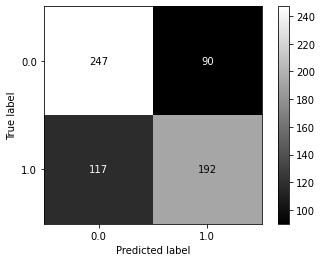

In [78]:
# Size de la grafica
fig = plt.figure(figsize=(11,11))

# creacion de la matriz
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)

# visualizacion de la matriz
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

In [79]:
# Calcular métricas a partir de la matriz de confusión
TP = cm[1, 1]  # Verdaderos positivos
TN = cm[0, 0]  # Verdaderos negativos
FP = cm[0, 1]  # Falsos positivos
FN = cm[1, 0]  # Falsos negativos

In [80]:
# Calcular precisión, sensibilidad, especificidad, y tasa de error
precision = TP / (TP + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
tasa_error = (FP + FN) / (TP + TN + FP + FN)

# Imprimir las métricas
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("Especificidad:", especificidad)
print("Tasa de Error:", tasa_error)
print('f1-score: ',(2*precision*sensibilidad)/(precision + sensibilidad))

Precisión: 0.6808510638297872
Sensibilidad: 0.6213592233009708
Especificidad: 0.7329376854599406
Tasa de Error: 0.3204334365325077
f1-score:  0.649746192893401


# Prediccion del modelo para test_data

In [81]:
# creamos la nueva prediccion
prediction_test = model.predict(Xt)

In [82]:
# convertimos las predicciones a un dataframe
df_pred = pd.DataFrame(prediction_test, columns=['abandono_6meses'])
df_pred.head()

,abandono_6meses
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [83]:
# trae los valores originales de id_colaborador al nuevo dataframe
df_pred['ID'] = df_test['id_colaborador'].values

# reordenar variables
df_pred = df_pred[['ID','abandono_6meses']]

#Convertir valores a formato correcto
df_pred['abandono_6meses'] = df_pred['abandono_6meses'].astype(int)

df_pred

,ID,abandono_6meses
0,100486,0
1,103752,0
2,103937,1
3,101744,0
4,101037,0
...,...,...
2015,103755,1
2016,103976,1
2017,104115,1
2018,103920,1


In [84]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2020 non-null   int64
 1   abandono_6meses  2020 non-null   int64
dtypes: int64(2)
memory usage: 31.7 KB


# Exportar Predicciones

In [85]:
# exportar predicciones
df_pred.to_csv('submission_4.csv', index=False)